# GWInSpect

This notebook demonstrates the key functionalities of the ```GWInSpect``` Python package, which is designed to compute the present-day spectral energy density of inflationary first-order gravitational waves (GWs) which had travelled through unknown post-inflationary pre-hot Big Bang phase. The package models the pre-hot Big Bang phase consisting of multiple epochs with different constant equation-of-state parameters and includes:

* Compute the spectral energy density
* Check the BBN constraint
* Frequency $\leftarrow$ Temperature $\leftrightarrow$ Energy conversions
* Compute number of e-folds.

Each section in this notebook highlights the usage of functions from the respective submodules:

> - ```spectrum```
> - ```constraints```
> - ```cosmo_tools```
> - ```thermo```
> - ```constants```

### Module - spectrum

In [2]:
from gwinspect.spectrum import compute_omega_gw
import matplotlib.pyplot as plt

To compute the spectral energy density of inflationary first-order gravitational waves (GWs), we use the function ```compute_omega_gw```.  
In this function the pre-hot Big Bang phase is modelled by 'n' number of multiple epochs with different constant equations of state.

- $w_i$ : Equation of state of $i^{\rm th}$ epoch during pre-hot Big Bang phase.
- $E_i$ : Energy scale of the universe [in GeV] at the moment of transition from $i^{\rm th}$ epoch to $(i+1)^{\rm th}$ epoch during pre-hot Big Bang phase.
- $r$ : Tensor-to-scalar ratio.
- $E_{\rm inf}$ : Energy scale of the universe [in GeV] corresponding to the end of inflation.
- $E_{\rm r*}$ : Energy scale of the universe [in GeV] corresponding to the end of pre-hot Big Bang phase.
- $T_{\rm r*}$ : Temperature scale of the universe [in GeV] corresponding to the end of pre-hot Big Bang phase.

The mandatory arguements in ```compute_omega_gw``` are:
> * ```eos_list``` : list  
        Equation-of-state values $[w_1, ..., w_n]$ for pre-hot Big Bang epochs. Each $w \in [-0.28, 1)$.
> * ```energy_list``` : list  
        List of energies $[E_{n-1}, ..., E_2, E_1]$ (in GeV), provided from latest to earliest pre-hot Big Bang epoch.  
        This list does not include the energy scale at the end of pre-hot Big Bang ($E_{\rm r*}$).  
        If pre-hot Big Bang has n epochs, energy_list must have length n-1.  
        For single equation-of-state epoch (n=1), provide an empty list [].  
> * ```E_rstar```, ```T_rstar``` : float  
        ```E_rstar``` = $E_{\rm r*}$ [GeV]  
        ```T_rstar``` = $T_{\rm r*}$ [GeV]  
        You must specify exactly one of these. If both are provided, T_rstar is used.  
> * ```r```, ```E_inf``` : float  
        ```r``` = Tensor-to-scalar ratio, $r$  
        ```E_inf``` = $E_{\rm inf}$ [GeV]  
        You must specify exactly one of these. If both are provided, r is used.  

The typical output of ```compute_omega_gw``` is a tuple consisting of (```f_arr```, ```omega_gw_arr```)   
- ```f_arr``` : numpy array with present-day frequency of GWs from ```f_min``` = $2 \times 10^{-20}$ Hz to ```f_max``` = ```f_inf```, (compuated internally in the code) which corresponds to the tensor mode that re-entered the Hubble radius at the time of end of inflation. The number of points are set to default value ```num_of_points``` = 1000 in Log space.
- ```omega_gw_arr``` : numpy array of $\Omega_{\rm GW} (f)$ for frequencies in ```f_arr```.


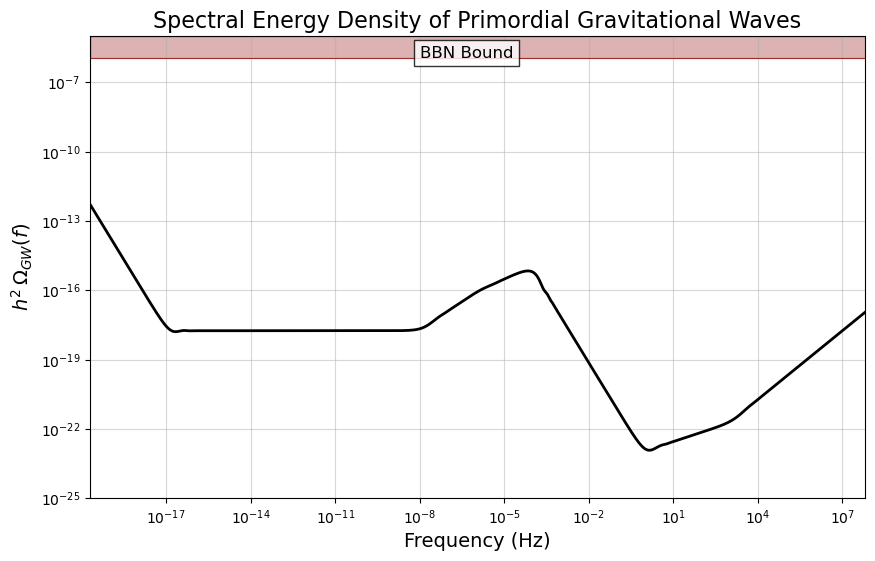

In [ ]:
# List of equation of state parameters during the pre-hot Big Bang phase, arranged in order of occurrence during pre-hot Big Bang phase
# [w1, w2, ..., wn] where wi is the equation of state parameter during the i-th epoch.
# The equations of state should be between -0.28 <= w < 1.
# An example with five epochs:
w1, w2, w3, w4, w5 = 0.99, 0.5, 0.0, 0.6, 0.8
eos_list1 = [w1, w2, w3, w4, w5]

#----------------------------------------------------------------------

# Energy scale of the universe at the beginning of hot Big Bang phase 
E_rstar1 = 1 # in GeV unit

# alternatively, one can also specify the temperature scale of the universe corresponding to the beginning of hot Big Bang phase, T_rstar (in GeV unit) instead of E_rstar.
# please look at the successive cells in this notebook for more details.

#----------------------------------------------------------------------

# List of transition energy scale between two successive epochs.
# [E_{n-1}, E_{n-2}, ..., E_1] where E_i is the energy scale at which the transition from epoch i to epoch i+1 occurs.
# The sequence of transition energy scales should be such that the first entry of the list belongs to the last transition before the hot Big Bang phase.
# Note that this sequence is chronologically reverse from the eqation of state list.
# The energy scales should be such that E_rstar < E_{n-1} < E_{n-2} < ... < E_1 < E_inf (where E_inf is the energy scale of inflation).
# The energy scales should be between 1e-3 GeV (from BBN) < E_rstar and E_inf < 1.4e16 GeV (corresponding to upperbound on 'r < 0.036').
E4, E3, E2, E1 = 1e2, 1e4, 1e8, 1e11
energy_list1 = [E4, E3, E2, E1] # in GeV unit 

#----------------------------------------------------------------------

# Tensor-to-scalar ratio at the pivot scale
# The value of 'r' should be r < 0.036 (current upperbound from CMB observations).
r1 = 0.001 

#----------------------------------------------------------------------

# Compute the spectral energy density of primordial gravitational waves
# f_arr         : array of frequencies (in Hz), from default range f_min 2e-20 Hz to f_max = f_inf (corresponding to energy scale of inflation))
# omega_gw_arr  : corresponding array of spectral energy density values h^2 Omega_gw(f)
f_arr, omega_gw_arr = compute_omega_gw(eos_list = eos_list1, E_rstar = E_rstar1, energy_list = energy_list1, r = r1)

#----------------------------------------------------------------------

bbn_bound = 1.13e-6 # Integrated BBN bound on Omega_gw h^2



# Plot the spectral energy density
plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
plt.xlabel(r'Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-25, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()

* If one needs the transition frequencies corresponding to the boundaries of each epoch in the pre-hot Big Bang phase, set ```show_freqs``` = ```True``` in ```compute_omega_gw```.  
This will return (```f_arr```, ```omega_gw_arr```, ```freq_boundaries```)  
```freq_boundaries``` : List consisting of $[f_0 = f_{\rm inf}, f_1, ... , f_n = f_{\rm r*}]$ in Hz

* If one needs the number of $e$-folds during each epoch in the pre-hot Big Bang phase, set ```show_efolds``` = ```True``` in ```compute_omega_gw```.  
This will return (```f_arr```, ```omega_gw_arr```, ```efold_list```)  
```efold_list``` : List consisting of $[N_{e1}, N_{e2}, ... , N_{en}]$

* If both ```show_freqs``` = ```True``` and ```show_efolds``` = ```True```
This will return (```f_arr```, ```omega_gw_arr```, ```freq_boundaries```, ```efold_list```)  

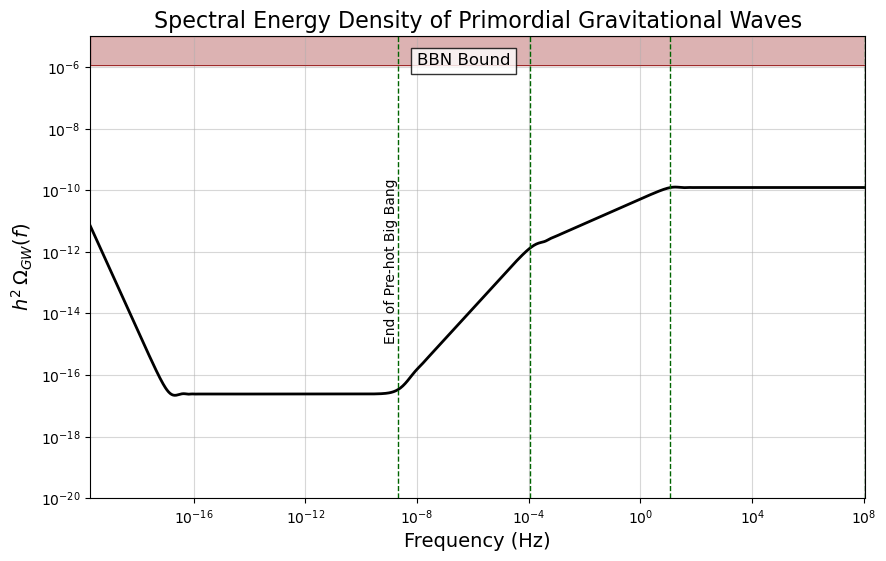

Transition Frequencies (Hz): [110703212.38223724, 11.075426678719047, 0.00011082041245140803, 2.0122402811126937e-09]
E-fold Values: [16.11809565095832, 10.23371152441798, 7.418294783190916]


In [ ]:
# List of equation of state parameters during the pre-hot Big Bang phase, arranged in order of occurrence during pre-hot Big Bang phase
# [w1, w2, ..., wn] where wi is the equation of state parameter during the i-th epoch.
# The equations of state should be between -0.28 <= w < 1.
# An example with three epochs:
w1, w2, w3 = 1/3, 0.5, 0.99
eos_list = [w1, w2, w3]

#----------------------------------------------------------------------

# Temperature at the beginning of hot Big Bang phase
T_rstar = 0.1 # in GeV unit

#-----------------------------------------------------------------------

# List of transition energy scale between two successive epochs.
# [E_{n-1}, E_{n-2}, ..., E_1] where E_i is the energy scale at which the transition from epoch i to epoch i+1 occurs.
# The sequence of transition energy scales should be such that the first entry of the list belongs to the last transition before the hot Big Bang phase.
# Note that this sequence is chronologically reverse from the eqation of state list.
# The energy scales should be such that E_rstar < E_{n-1} < E_{n-2} < ... < E_1 < E_inf (where E_inf is the energy scale of inflation).
# The energy scales should be between 1e-3 GeV (from BBN) < E_rstar and E_inf < 1.4e16 GeV (corresponding to upperbound on 'r < 0.036').
E2, E1 = 1e4, 1e9
energy_list = [E2, E1] # in GeV unit

#-----------------------------------------------------------------------

# Energy scale of inflation
E_inf = 1e16 # in GeV unit

#-----------------------------------------------------------------------

# Compute the spectral energy density of primordial gravitational waves
# f_arr             : array of frequencies (in Hz), from default range f_min 2e-20 Hz to f_max = f_inf (corresponding to energy scale of inflation))
# omega_gw_arr      : corresponding array of spectral energy density values h^2 Omega_gw(f)
# freq_boundaries   : list of transition frequencies (in Hz) corresponding to the transition energy scales in energy_list 
#                     including the frequencies corresponding to E_inf (or 'r') and E_rstar (or T_rstar).
#                     [f_0 = f_inf, f_1, f_2, ..., f_{n-1}, f_n = f_rstar] in Hz unit
# efold_list        : list of e-fold values corresponding to each epoch during the pre-hot Big Bang phase.
#                     [N_1, N_2, ..., N_n] where N_i is the e-fold value during the i-th epoch.
f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, 
                                                                       show_efolds=True, show_freqs=True) # <------ Note: This will return e-folds and transition frequencies
                                                                                                            # corresponding to the specified energy scales.

#----------------------------------------------------------------------

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2


# Plot the spectral energy density with transition frequencies marked
plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')

# Mark transition frequencies
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(freq_boundaries[-1], 1e-15, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', 
         ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()

# Print transition frequencies and e-fold values
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

If one needs to compute $\Omega_{\rm GW}$ for a desired range $<= f_{\rm inf}$, use the optional arguements ```f_min``` and ```f_max```.  
* Changing the default value of ```f_min``` = $2 \times 10^{-20}$ Hz to a lower value will print a warning, since those frequencies may correspond to super-Hubble modes today.
* If ```f_max``` $>$ ```f_inf```, a ValueError is raised.
* ```f_arr``` will have 1000 points in log space from ```f_min``` to ```f-max```. Accordingly their $\Omega_{\rm GW}$ value id returned in ```omega_gw_arr```.

This feature id useful is the user needs to compute $\Omega_{\rm GW}$ for a certain short range. Also, reducing the value of number of points in ```num_of_points``` along with this for a shorter range will save compuatational time.

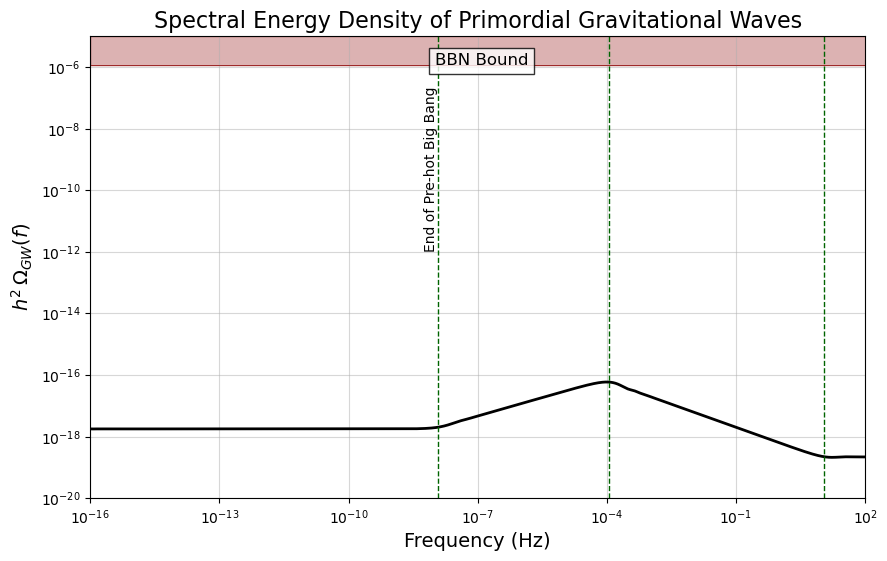

Transition Frequencies (Hz): [63783769.56685421, 11073.114560231512, 11.075426678719047, 0.00011082041245140803, 1.1704138319373228e-08]
E-fold Values: [6.076469385558831, 6.907755278982137, 12.792139405522477, 8.186959514327503]


In [ ]:
# Equation of state parameters
w1, w2, w3, w4 = 0.9, 1/3, 0.2, 0.5
eos_list = [w1, w2, w3, w4]

# Energy scale at the beginning of hot Big Bang phase
E_rstar = 1 # in GeV unit

# Transition energy scales between epochs during pre-hot Big Bang phase
E3, E2, E1 = 1e4, 1e9, 1e12
energy_list = [E3, E2, E1] # in GeV unit

# Tensor-to-scalar ratio
r = 1e-3

# Frequency range for computing Omega_gw
# In this case, we explicitly set f_min and f_max, so that the output frequency array f_arr lies within this range.
# This range should be within the default range of frequencies computed by the function, i.e., 2e-20 Hz < f_min < f_max < f_inf

f_min = 1e-16 # in Hz unit, minimum frequency limit to compute Omega_gw
f_max = 1e2 # in Hz unit, maximum frequency to limit to compute Omega_gw

# Compute the spectral energy density of primordial gravitational waves
# f_arr             : array of frequencies (in Hz), from specified range f_min to f_max
# omega_gw_arr      : corresponding array of spectral energy density values h^2 Omega_gw(f)
# freq_boundaries   : list of transition frequencies (in Hz) corresponding to the transition energy scales in energy_list 
#                     including the frequencies corresponding to E_inf (or 'r') and E_rstar (or T_rstar).
#                     [f_0 = f_inf, f_1, f_2, ..., f_{n-1}, f_n = f_rstar] in Hz unit
# efold_list        : list of e-fold values corresponding to each epoch during the pre-hot Big Bang phase.
#                     [N_1, N_2, ..., N_n] where N_i is the e-fold value during the i-th epoch.
f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, E_rstar=E_rstar,
                                                                       energy_list=energy_list, r=r, show_efolds=True,show_freqs=True, 
                                                                       f_min=f_min, f_max=f_max) # <------ Note: f_arr will now be within f_min and f_max specified above

#----------------------------------------------------------------------

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2


# Plot the spectral energy density with transition frequencies marked
plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')

# Mark transition frequencies
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)

plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1]) #<------- Note: f_arr[0] and f_arr[-1] will now be within f_min and f_max specified above
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(freq_boundaries[-1], 1e-12, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

If one like to compute the spectrum for selected frequencies (not a range), they can use the optional arguement ```f_custom```. It accepts numpy arrays or list.  
Even if the interested frequency is just one value, it needs to be given as an array or a list. The output in ```f_arr``` and ```omega_gw_arr``` will be a numpy array of single element.

In [12]:
# Equation of state parameters
w1, w2, w3 = 1/3, 0.5, 0.99
eos_list = [w1, w2, w3]

# Temperature at the beginning of hot Big Bang phase
T_rstar = 0.1 # in GeV unit

# Transition energy scales between epochs during pre-hot Big Bang phase
E2, E1 = 1e4, 1e9
energy_list = [E2, E1] # in GeV unit

# Energy scale of inflation
E_inf = 1e16 # in GeV unit

# Custom frequencies to evaluate Omega_gw
f_custom = [1e-7, 1e0, 1e4] # in Hz unit


# Compute the spectral energy density of primordial gravitational waves at custom frequencies
# f_arr             : array of custom frequencies (in Hz) where Omega_gw is evaluated
# omega_gw_arr      : corresponding array of spectral energy density values h^2 Omega_g
# freq_boundaries   : list of transition frequencies (in Hz) corresponding to the transition energy scales in energy_list 
#                     including the frequencies corresponding to E_inf (or 'r') and E_rstar (or T_rstar).
#                     [f_0 = f_inf, f_1, f_2, ..., f_{n-1}, f_n = f_rstar] in Hz unit
# efold_list        : list of e-fold values corresponding to each epoch during the pre-hot Big Bang phase.
#                     [N_1, N_2, ..., N_n] where N_i is the e-fold value during the i-th epoch.
f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, show_efolds=True, show_freqs=True, 
                                                                       f_custom=f_custom) # <------ Note: Omega_gw is now evaluated at the specified custom frequencies

# ----------------------------------------------------------------------

# Print spectral energy density at custom frequencies, transition frequencies and e-fold values
print(f"Custom Frequencies (Hz): {f_custom}")
print(f"Spectral energy density at Custom Frequencies: {omega_gw_arr}")
print("")
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

Custom Frequencies (Hz): [1e-07, 1.0, 10000.0]
Spectral energy density at Custom Frequencies: [1.47081231e-15 5.15336577e-11 1.21552280e-10]

Transition Frequencies (Hz): [110703212.38223724, 11.075426678719047, 0.00011082041245140803, 2.0122402811126937e-09]
E-fold Values: [16.11809565095832, 10.23371152441798, 7.418294783190916]


### Module - constraints

In [17]:
from gwinspect.constraints import check_bbn
from gwinspect.spectrum import compute_omega_gw
import matplotlib.pyplot as plt

To check whether the BBN constraint for gravitational waves is satisfied or not, we have introduced an equation obtained using piecewise integration of the analytical BBN constraint equation (the full expression is available in our paper).  
In this package one can check whether the multi-epoch pre-hot Big Bang phase specified by the user satisfies the BBN constraint or not using the function ```check_bbn```.  
It takes the same input parameters as ```compute_omega_gw``` in specifying the mutiple epochs.  
The function will return a tuple with (```bbn_integral```, ```is_satisfied```):
* ```bbn_integral``` : The value of the piecewise integral of $h^ \Omega_{\rm GW}$ from $f_{\rm BBN} $ to $f_{\rm inf}$ in log space.
* ```is_satisfied``` : return ```True``` if ```bbn_integral``` $< 1.13e-6$, the BBN bound. Else return ```False```.

One can also change the value of BBN bound using the optional arguement ```bbn_bound``` whose default value is $1.13e-6$.  
The optional arguement ```tol``` can also be changed from its default value $1e-12$. This is used for checking whether to perform Logarithm limit or not in the piecewise integral expression for numerical stability when $w \rightarrow 1/3$. Logarith limit is used when $|(2/(1+3w)) - 1| <$ ```tol```.

In [18]:
# Equation of state parameters
w1, w2, w3 = 1/3, 0.5, 0.99
eos_list = [w1, w2, w3]

# Temperature at the beginning of hot Big Bang phase
T_rstar = 0.1 # in GeV unit

# Transition energy scales between epochs during pre-hot Big Bang phase
E2, E1 = 1e4, 1e9
energy_list = [E2, E1] # in GeV unit

# Energy scale of inflation
E_inf = 1e16 # in GeV unit


# Check BBN constraint
# bbn_integral : computed integral value of Omega_gw h^2 over frequency range relevant for BBN constraint using piecewise integration
# is_satisfied : boolean indicating whether the BBN constraint is satisfied (i.e., bbn_integral < 1.13e-6)
bbn_integral, is_satisfied = check_bbn(eos_list=eos_list, T_rstar=T_rstar,
                                      energy_list=energy_list, E_inf=E_inf)


# Print BBN integral value and whether the constraint is satisfied
print(f"BBN Integral Value: {bbn_integral}")
if is_satisfied:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} < 1.13e-6")
else:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} >= 1.13e-6")

BBN Integral Value: 3.1152069498046095e-09
Is BBN Constraint Satisfied? True: 3.1152069498046095e-09 < 1.13e-6


An example where BBN constraint is violated.

BBN Integral Value: 1.1120931480505239e-05
Is BBN Constraint Satisfied? False: 1.1120931480505239e-05 >= 1.13e-6


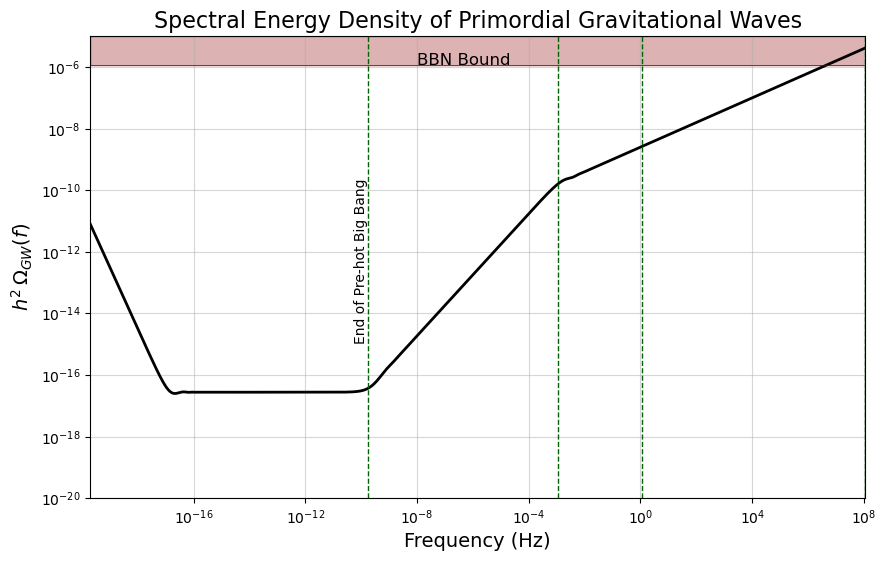

In [ ]:
# Equation of state parameters
w1, w2, w3 = 0.5, 0.5, 0.99
eos_list = [w1, w2, w3]

# Temperature at the beginning of hot Big Bang phase
T_rstar = 0.01 # in GeV unit

# Transition energy scales between epochs during pre-hot Big Bang phase
E2, E1 = 1e5, 1e8
energy_list = [E2, E1] # in GeV unit

# Energy scale of inflation
E_inf = 1e16 # in GeV unit


# Check BBN constraint
bbn_integral, is_satisfied = check_bbn(eos_list=eos_list, T_rstar=T_rstar,
                                      energy_list=energy_list, E_inf=E_inf)


# Print BBN integral value and whether the constraint is satisfied
print(f"BBN Integral Value: {bbn_integral}")
if is_satisfied:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} < 1.13e-6")
else:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} >= 1.13e-6")


# Compute the spectral energy density of primordial gravitational waves (for plotting)
f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, show_efolds=True, show_freqs=True)

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2



# Plot the spectral energy density with transition frequencies marked
plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12)
plt.text(freq_boundaries[-1], 1e-15, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', 
         ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()

### Module - cosmo_tools

In [23]:
from gwinspect.cosmo_tools import energy_of_T, temp_of_E, freq_of_T, compute_efolds
import numpy as np

* The conversion between (*effective*) temperature scale and energy scale of the Universe can be performed using:
> * ```energy_of_T```: convert temperature in GeV to energy scale in GeV
> * ```temp_of_E```: convert energy scale in GeV to temperature in GeV


In [24]:
T1 = 1e3  # Temperature in GeV
E1 = energy_of_T(T1)
print(f"Energy corresponding to T = {T1} GeV is E={E1} GeV")

T2 = temp_of_E(E1)
print(f"Temperature corresponding to E = {E1} GeV is T = {T2} GeV")

Energy corresponding to T = 1000.0 GeV is E=2419.574619232779 GeV
Temperature corresponding to E = 2419.574619232779 GeV is T = 999.9999464910444 GeV


> **Note**: The function to convert from energy [GeV] to temperature [GeV] is not uniquely defined as the effective number of relativistic degrees of freedom in energy density is defined as a function of the temperature that needs to be computed. That is why you see a slightly different value of temperature when converting from energy.
 Hence, in the inverse conversion between temperature and energy we use an approximate value of $g_{*}(T_f)$, where $T_f$ is a floor temperature corresponding to the floor energy $E_f \leq E_{\rm query}$, which have been pre-computed and stored in ```src/gwinspect/data/eff_rel_dof.txt```.

These functions are also vectorised to accepet more than one element

In [25]:
temp_list = np.logspace(-13, 16, 30, base=10) # List of temperatures in GeV
energy_list = energy_of_T(temp_list) # Convert to energy list in GeV
new_temp_list = temp_of_E(energy_list) # Convert back to temperature list in GeV using an (approximate) inverse function
rel_diff = (temp_list-new_temp_list)/(temp_list) # Relative difference between original and new temperature lists

# compare temp_list and new_temp_list
print(f'Original temperature list: {temp_list}')
print("")
print(f'New temperature list: {new_temp_list}')
print("")
print(f'Relative change: {rel_diff}')


Original temperature list: [1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04
 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06
 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16]

New temperature list: [1.00000000e-13 1.00000000e-12 1.00000000e-11 1.00000000e-10
 1.00000000e-09 1.00000000e-08 1.00000000e-07 1.00000000e-06
 1.00000000e-05 1.00002056e-04 1.00000250e-03 1.00000082e-02
 1.00006728e-01 1.00000363e+00 1.00000009e+01 1.00000703e+02
 9.99999946e+02 1.00000013e+04 1.00000001e+05 1.00000014e+06
 1.00000004e+07 1.00000006e+08 9.99999970e+08 9.99999995e+09
 9.99999995e+10 9.99999990e+11 1.00000004e+13 1.00000009e+14
 9.99999924e+14 1.00000002e+16]

Relative change: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.05581507e-05 -2.50039832e-06 -8.20930667e-07
 -6.72828784e-05 -3.62552036e-06 -9.16704169e-08 -7.02901789e-06

* The present-day frequency [Hz] of the gravitational waves (GWs) that had re-entered the Hubble radius during the time when the *effective* temperature scale of the Universe was $T$ [GeV] can be obtained using the function ```freq_of_T```

In [26]:
T3 = 1e-3 # Temperature in GeV
f3 = freq_of_T(T3) # Corresponding frequency in Hz
print(f"Present-day frequency of GWs corresponding to T = {T3} GeV is f = {f3} Hz")

Present-day frequency of GWs corresponding to T = 0.001 GeV is f = 1.8302380321590414e-11 Hz


This function is also vectorised

In [27]:
freq_list = freq_of_T(temp_list) # Corresponding frequencies in Hz of temp_list defined two cells above
print(f"Present-day frequencies of GWs corresponding to temperatures: \n \n {temp_list} GeV \n  \n are : \n \n {freq_list} Hz")

Present-day frequencies of GWs corresponding to temperatures: 
 
 [1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04
 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06
 1.e+07 1.e+08 1.e+09 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16] GeV 
  
 are : 
 
 [1.44051756e-21 1.44051756e-20 1.44051756e-19 1.44051756e-18
 1.44051756e-17 1.44051756e-16 1.44051756e-15 1.44051756e-14
 1.44051756e-13 1.52285639e-12 1.83023803e-11 1.83609381e-10
 2.01224028e-09 2.51952269e-08 2.56973768e-07 2.67433266e-06
 2.68151545e-05 2.68104319e-04 2.68193484e-03 2.68277064e-02
 2.68334472e-01 2.68370908e+00 2.68394027e+01 2.68409817e+02
 2.68422446e+03 2.68434758e+04 2.68448733e+05 2.68465823e+06
 2.68487186e+07 2.68513847e+08] Hz


* The number of *e*-folds extended during an epoch with constant equation of state parameter $w$ and the energy scales marking the beginning and end of the epoch being $E_i$ and $E_f$, respectively, can be obtained using ```get_efolds```

In [28]:
w = 0.8 # Equation of state parameter
Ei = 1e6  # Initial energy scale in GeV
Ef = 1e4  # Final energy scale in GeV
N_efolds = compute_efolds(w = w, Ei = Ei, Ef = Ef) # Compute number of e-folds between Ei and Ef for equation of state w
print(f"Number of e-folds from E = {Ei} GeV to E = {Ef} GeV with w = {w} is N = {N_efolds}")

Number of e-folds from E = 1000000.0 GeV to E = 10000.0 GeV with w = 0.8 is N = 3.4112371748059935


### Module - thermo

This module contains the functions for computing the effctive number of relativistic degrees of freedom in energy density, ```g_star(T)```, and entropy density, ```g_s(T)```.
These functions are defined using the fitting functions given in:
>   **K. Saikawa and S. Shirai,**  
    "Primordial gravitational waves, precisely: The role of thermodynamics in the Standard Model",  
    JCAP 05 (2018) 035, [arXiv:1803.01038](https://arxiv.org/abs/1803.01038).

In [29]:
from gwinspect.thermo import g_star, g_s, load_eff_rel_dof
from gwinspect import thermo
import numpy as np
import matplotlib.pyplot as plt

The users can call the function ```g_star(T)``` and ```g_s(T)``` to get the values effctive number of relativistic degrees of freedom in energy density and entropy density respectively.

In [30]:
g_star_100GeV = g_star(100) # Number of effective relativistic degrees of freedom in energy density at T = 100 GeV
g_s_100GeV = g_s(100) # Number of effective relativistic degrees of freedom in entropy density at T = 100 GeV

g_star_bbn = g_star(1e-3) # Number of effective relativistic degrees of freedom in energy density at T = 1 MeV
g_s_bbn = g_s(1e-3) # Number of effective relativistic degrees of freedom in entropy density at T = 1 MeV   

print(f"g_star at 100 GeV: {g_star_100GeV}")
print(f"g_s at 100 GeV: {g_s_100GeV}")
print(f"g_star at BBN: {g_star_bbn}")
print(f"g_s at BBN: {g_s_bbn}")

g_star at 100 GeV: 101.3199486688676
g_s at 100 GeV: 100.69360202663638
g_star at BBN: 10.545445470597219
g_s at BBN: 10.548249394009476


The pre-computed data in ```src/gwinspect/data/eff_rel_dof.txt``` contains 4 columns: ```Temperature [GeV], g_star(T), g_s(T), Energy(T) [GeV]```. Temperature is in Log-space from $10^{-13}$ GeV to $10^{16}$ GeV, with $10^5$ entries. This data can be loaded using ```load_eff_rel_dof()```, which each columns in the txt file in order.

In [31]:
table = load_eff_rel_dof() # load the data from eff_rel_dof.txt file

# Print first 20 entries of each column in the table
print("First 20 entries from eff_rel_dof.txt:")
print(f'Temperature [GeV]: \n {table[0][:20]} \n')
print(f'g_star: \n {table[1][:20]} \n')
print(f'g_star: \n {table[2][:20]} \n')
print(f'Energy [GeV]: \n {table[3][:20]} \n')

First 20 entries from eff_rel_dof.txt:
Temperature [GeV]: 
 [1.000000e-13 1.000668e-13 1.001336e-13 1.002005e-13 1.002675e-13
 1.003344e-13 1.004015e-13 1.004685e-13 1.005356e-13 1.006028e-13
 1.006700e-13 1.007372e-13 1.008045e-13 1.008719e-13 1.009392e-13
 1.010067e-13 1.010741e-13 1.011417e-13 1.012092e-13 1.012768e-13] 

g_star: 
 [3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383
 3.383 3.383 3.383 3.383 3.383 3.383 3.383 3.383] 

g_star: 
 [3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931
 3.931 3.931 3.931 3.931 3.931 3.931 3.931 3.931] 

Energy [GeV]: 
 [1.027117e-13 1.027804e-13 1.028490e-13 1.029177e-13 1.029865e-13
 1.030553e-13 1.031241e-13 1.031930e-13 1.032619e-13 1.033309e-13
 1.033999e-13 1.034690e-13 1.035381e-13 1.036073e-13 1.036765e-13
 1.037457e-13 1.038150e-13 1.038844e-13 1.039538e-13 1.040232e-13] 



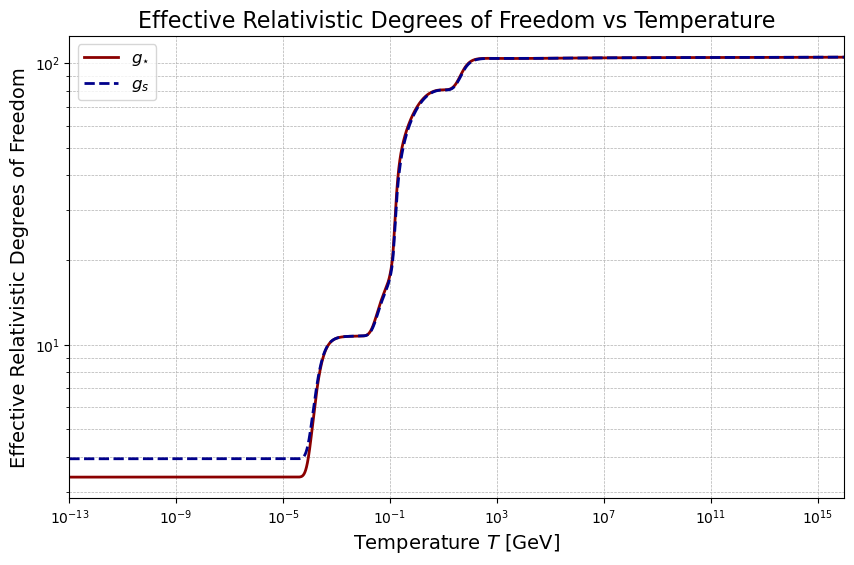

In [32]:
Temp, gstar, gs, _ = load_eff_rel_dof() # Unpack the data into separate arrays from eff_rel_dof.txt for plotting

# Plot g_star and g_s as functions of temperature
plt.figure(figsize=(10, 6))
plt.plot(Temp, gstar, label=r"$g_{\star}$", color='darkred', lw=2, ls='-')
plt.plot(Temp, gs, label=r"$g_{s}$", color='darkblue', lw=2, ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Temperature $T$ [GeV]', fontsize=14)
plt.ylabel(r'Effective Relativistic Degrees of Freedom', fontsize=14)
plt.title(r'Effective Relativistic Degrees of Freedom vs Temperature', fontsize=16)
plt.xlim(table[0].min(), table[0].max())
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

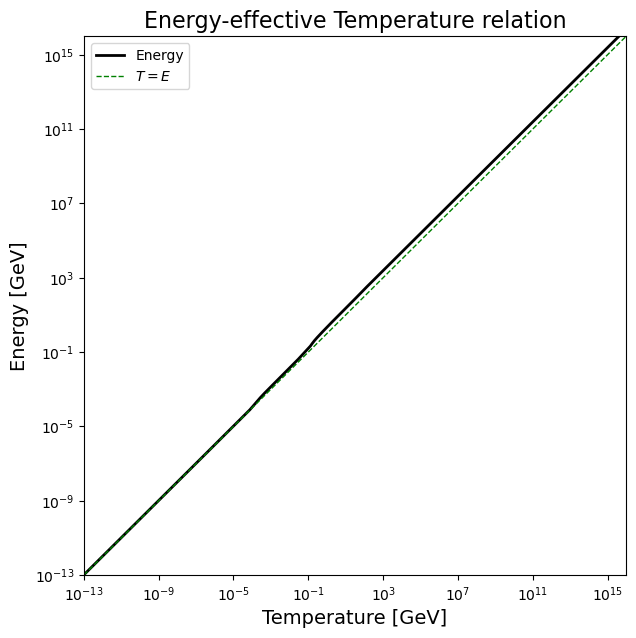

In [33]:
Temp, _, _, energy = load_eff_rel_dof() # Unpack the data into separate arrays from eff_rel_dof.txt for plotting

# Plot Energy vs Temperature
plt.figure(figsize=(7, 7))
plt.plot(Temp, energy, color='black', lw=2, ls='-', label = 'Energy')
plt.plot(Temp, Temp, color='green', lw=1, ls='--', label = r'$T = E$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Temperature [GeV]', fontsize=14)
plt.ylabel(r'Energy [GeV]', fontsize=14)
plt.title(r'Energy-effective Temperature relation', fontsize=16)
plt.xlim(Temp.min(), Temp.max())
plt.ylim(Temp.min(), Temp.max())
plt.legend()
plt.show()

### Module - constants

In [34]:
import gwinspect.constants as const

This moudule contains some of the constant values used throughout in the package gwinspect. Their default values are as follows:

In [35]:
# Print gwinspect constants
print("Using gwinspect constants:")
print(f"Reduced Planck mass m_P                         = {const.m_P} GeV")
print(f"Scalar amplitude A_S                            = {const.A_S} GeV")
print(f"CMB temperature today T0                       = {const.T0} GeV")
print(f"Radiation density parameter today Omega_rad0   = {const.omega_rad0}")
print(f"BBN temperature T_bbn                           = {const.T_bbn} GeV")
print(f"Matter-radiation equality temperature T_eq      = {const.T_eq} GeV")

Using gwinspect constants:
Reduced Planck mass m_P                         = 2.44e+18 GeV
Scalar amplitude A_S                            = 2.1e-09 GeV
CMB temperature today T0                       = 2.35e-13 GeV
Radiation density parameter today Omega_rad0   = 4.16e-05
BBN temperature T_bbn                           = 0.001 GeV
Matter-radiation equality temperature T_eq      = 1e-09 GeV


The user can also globally redefine these values if they want for higer precision using the function ```set_constants(...)```.
> ⚠️ **Note:** Avoid using `from gwinspect.constants import m_P` — it creates a static copy and won't reflect updates made by `set_constants(...)`. Always use `import gwinspect.constants as const` to ensure values stay up to date.


In [36]:
# Override default constants, for example, m_P and T0
const.set_constants(m_P=2.43e18, T0=2.351e-13)

print("\nAfter overriding m_P and T0:")
print(f"Reduced Planck mass m_P                         = {const.m_P} GeV")
print(f"CMB temperature today T0                       = {const.T0} GeV")


After overriding m_P and T0:
Reduced Planck mass m_P                         = 2.43e+18 GeV
CMB temperature today T0                       = 2.351e-13 GeV


> ℹ️ **Note:** Once you call `set_constants(...)`, the updated values persist for the rest of the entire notebook session.
> Even earlier cells will reflect the new values if re-run.
> To reset constants back to their defaults, you must **restart the kernel**.
